Logistic Regression

In [302]:
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

# Basic Imports
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [303]:
#Load the data set train
df_train = pd.read_csv('Titanic_train.csv')


Exploratory data analysis (EDA)

In [304]:
# Basic dataset info
print("Train Shape:", df_train.shape)

Train Shape: (891, 12)


In [305]:
print("\nTrain Info:")
df_train.info()


Train Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [306]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [307]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [308]:
# Data Types & Null Check
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [309]:
# Check missing values per column
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [310]:
# Impute Age with median
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].median())

# Impute Embarked with mode
df_train["Embarked"] = df_train["Embarked"].fillna(df_train["Embarked"].mode()[0])

# Drop Cabin column
df_train = df_train.drop(columns=["Cabin"])

In [311]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [312]:
# Count duplicate rows
df_train.duplicated().sum()

np.int64(0)

In [313]:
# load the dataset Test
df_test = pd.read_csv('Titanic_test.csv')

In [314]:
print("Test Shape:", df_test.shape)

Test Shape: (418, 11)


In [315]:
print("\nTest Info:")
df_test.info()


Test Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [316]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [317]:
# Check missing values per column
df_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [318]:
# Impute Age with median
df_test["Age"] = df_test["Age"].fillna(df_test["Age"].median())

# Impute Embarked with mode
df_test["Fare"] = df_test["Fare"].fillna(df_test["Fare"].mode()[0])

# Drop Cabin column
df_test = df_test.drop(columns=["Cabin"])

In [319]:
df_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [320]:
# Count duplicate rows
df_test.duplicated().sum()

np.int64(0)

Create Visualization

In [321]:
# Correlation matrix for numerical features
corr_matrix = df_train.corr(numeric_only=True)
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


In [322]:
corr_matrix = df_test.corr(numeric_only=True)
corr_matrix

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.026751,-0.031447,0.003818,0.043080,0.008767
Pclass,-0.026751,1.000000,-0.467853,0.001087,0.018721,-0.577491
Age,-0.031447,-0.467853,1.000000,-0.071197,-0.043731,0.341614
SibSp,0.003818,0.001087,-0.071197,1.000000,0.306895,0.172034
Parch,0.043080,0.018721,-0.043731,0.306895,1.000000,0.230411
Fare,0.008767,-0.577491,0.341614,0.172034,0.230411,1.000000


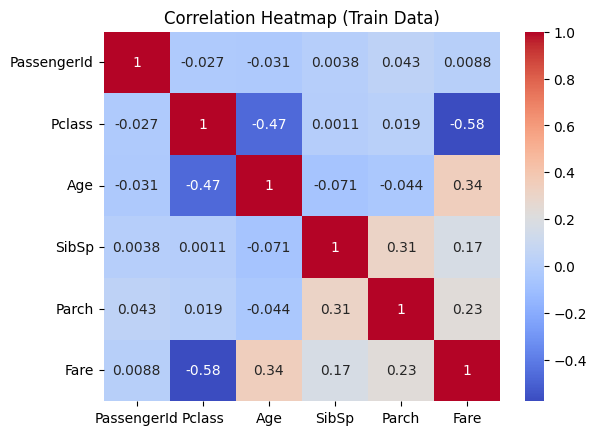

In [323]:
# Heatmap: visualize correlations
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Train Data)")
plt.show()

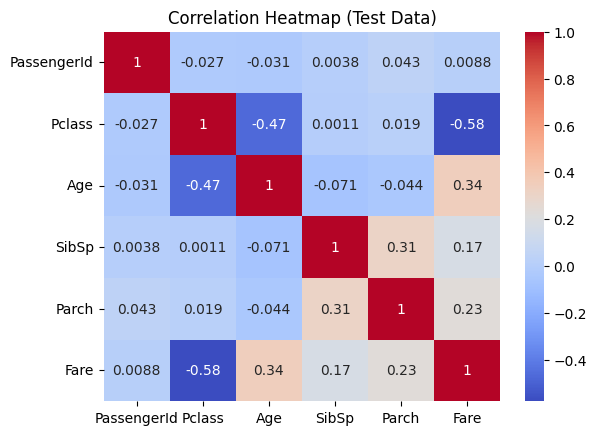

In [324]:
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Test Data)")
plt.show()

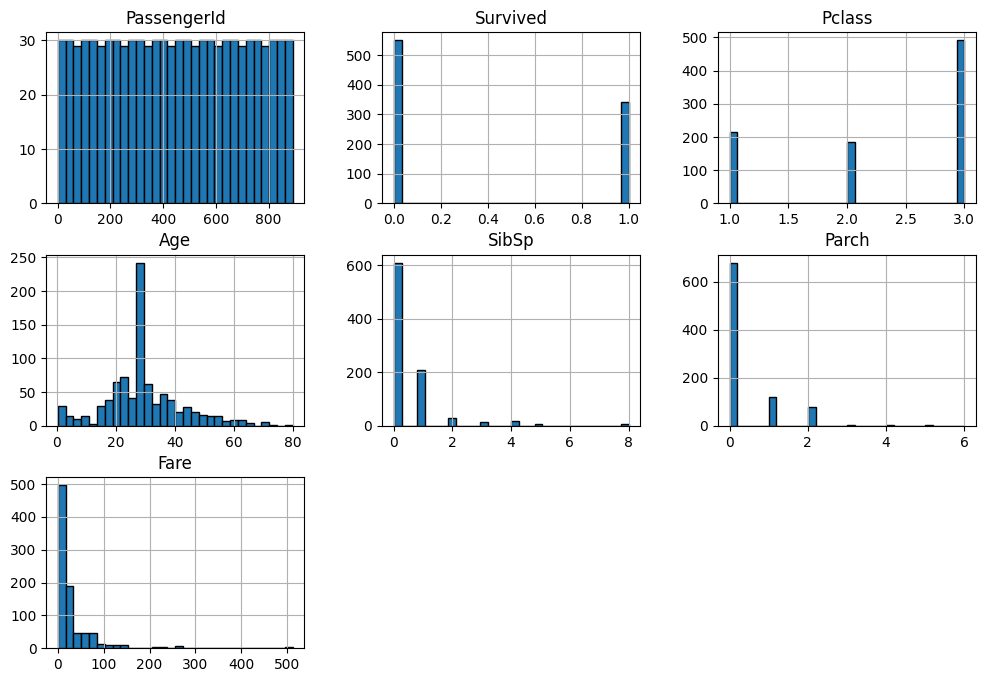

In [325]:
# Histogram plot for numerical columns
df_train.hist(bins=30, figsize=(12,8),edgecolor="black")
plt.show()

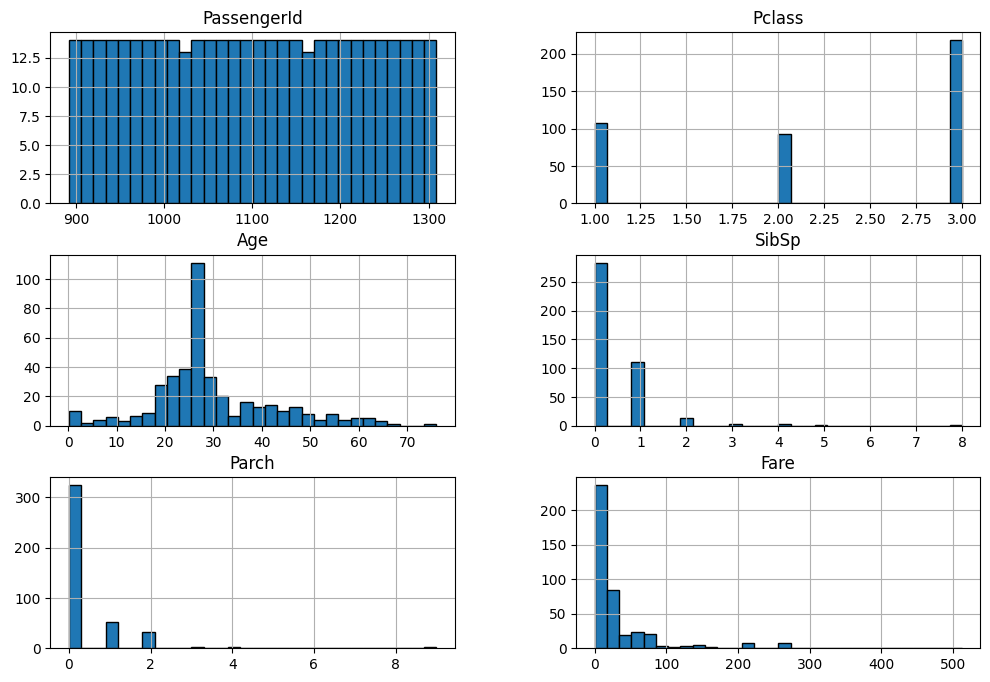

In [326]:
df_test.hist(bins=30, figsize=(12,8),edgecolor="black")
plt.show()

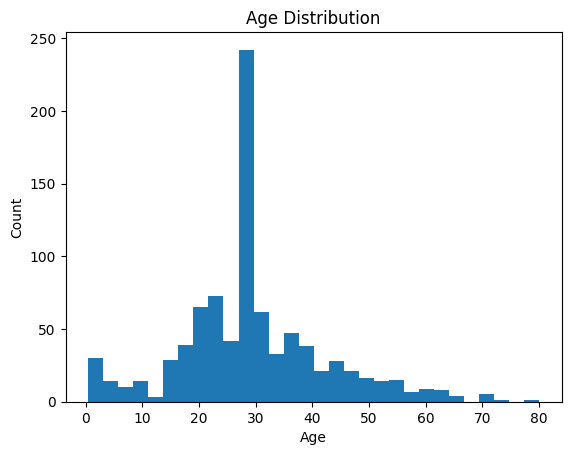

In [327]:
# Histogram: Age distribution
plt.hist(df_train["Age"], bins=30)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()

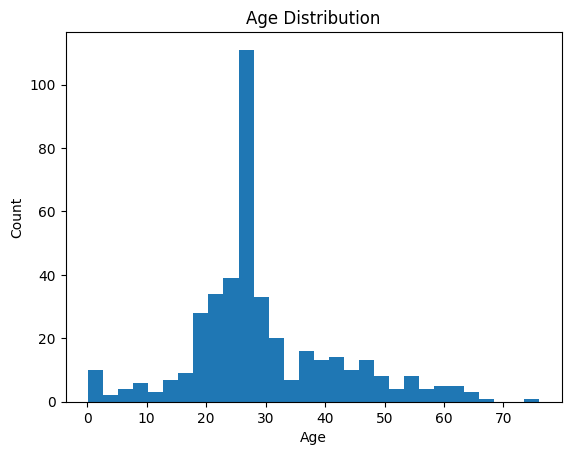

In [328]:
# Histogram: Age distribution
plt.hist(df_test["Age"], bins=30)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()

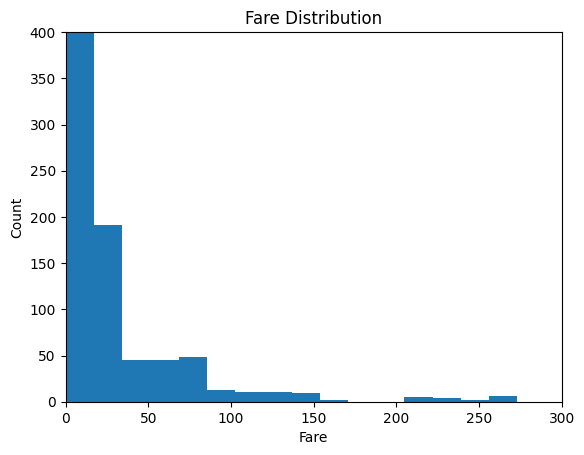

In [329]:
# Histogram: Fare distribution
plt.hist(df_train["Fare"], bins=30)
plt.xlabel("Fare")
plt.ylabel("Count")
plt.title("Fare Distribution")

# Set axis limits
plt.xlim(0, 300)
plt.ylim(0, 400)

plt.show()

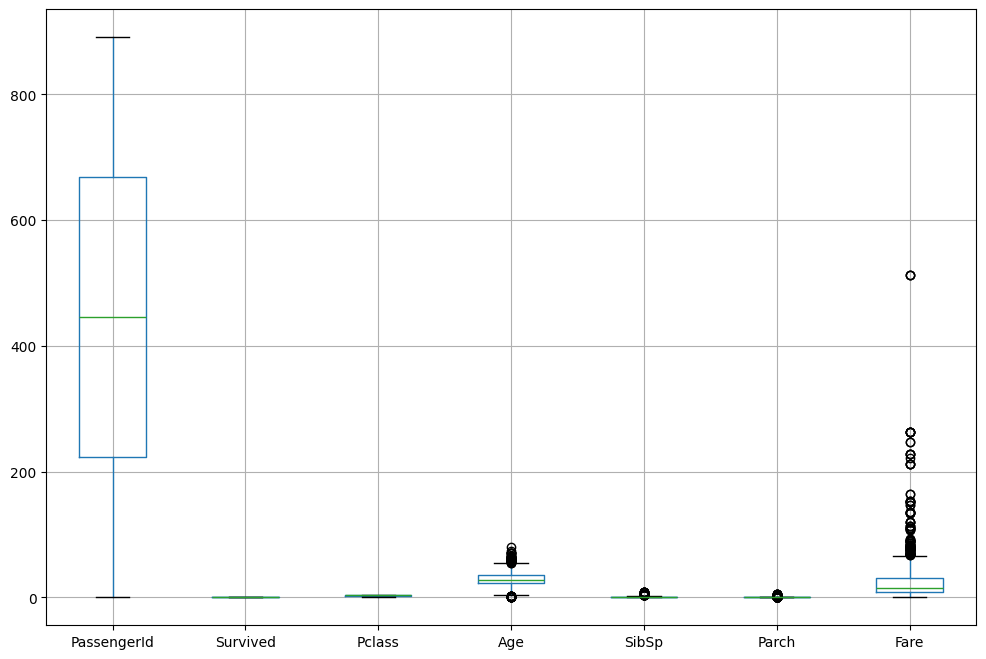

In [330]:
# outliers detected
df_train.boxplot(figsize=(12,8))
plt.show()

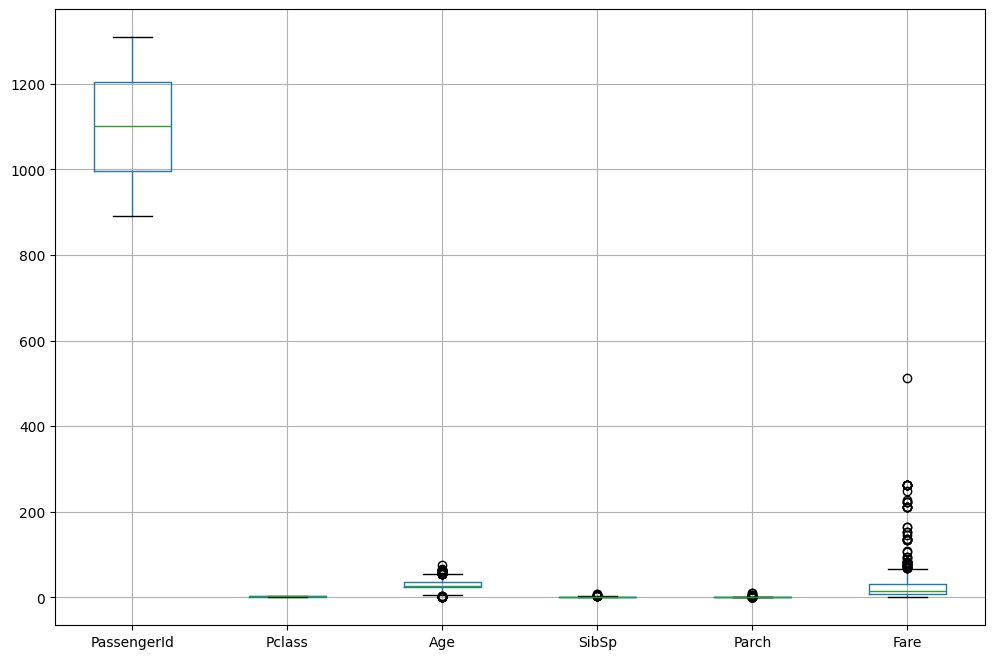

In [331]:
df_test.boxplot(figsize=(12,8))
plt.show()

Outliers should not be removed from the Titanic dataset because the extreme values, particularly in the Fare feature, represent genuine and meaningful observations rather than data errors. These higher fares correspond to first-class passengers, who historically had better access to lifeboats and higher survival chances. Removing such values would eliminate important information and weaken the relationship

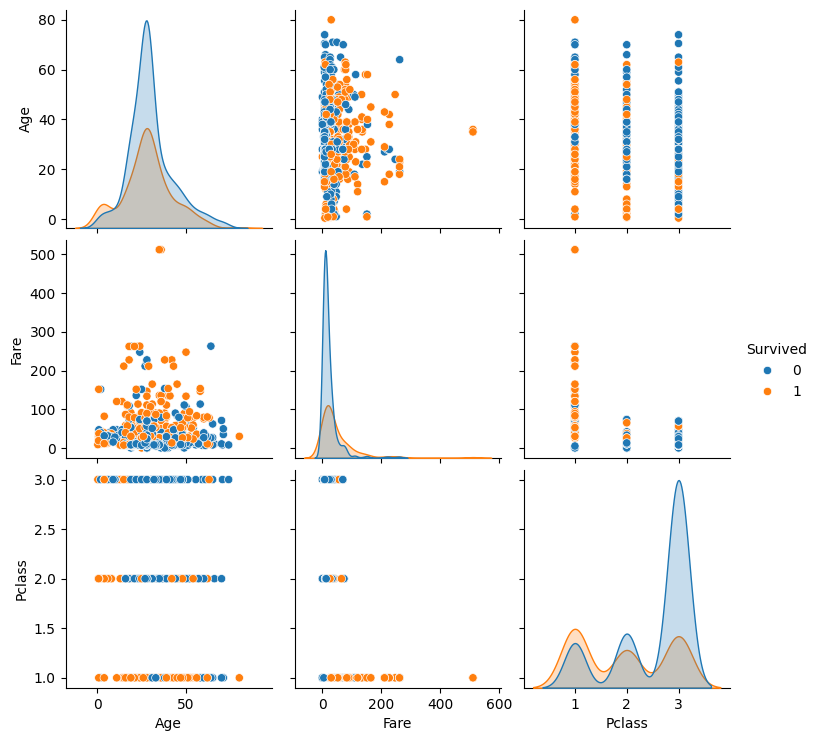

In [332]:
# Pair plot: relationships between key numerical features
sns.pairplot(
    df_train,
    vars=["Age", "Fare", "Pclass"],  # These three features are chosen because they are the most meaningful numerical predictors of survival in the Titanic dataset.
    hue="Survived"
)
plt.show()

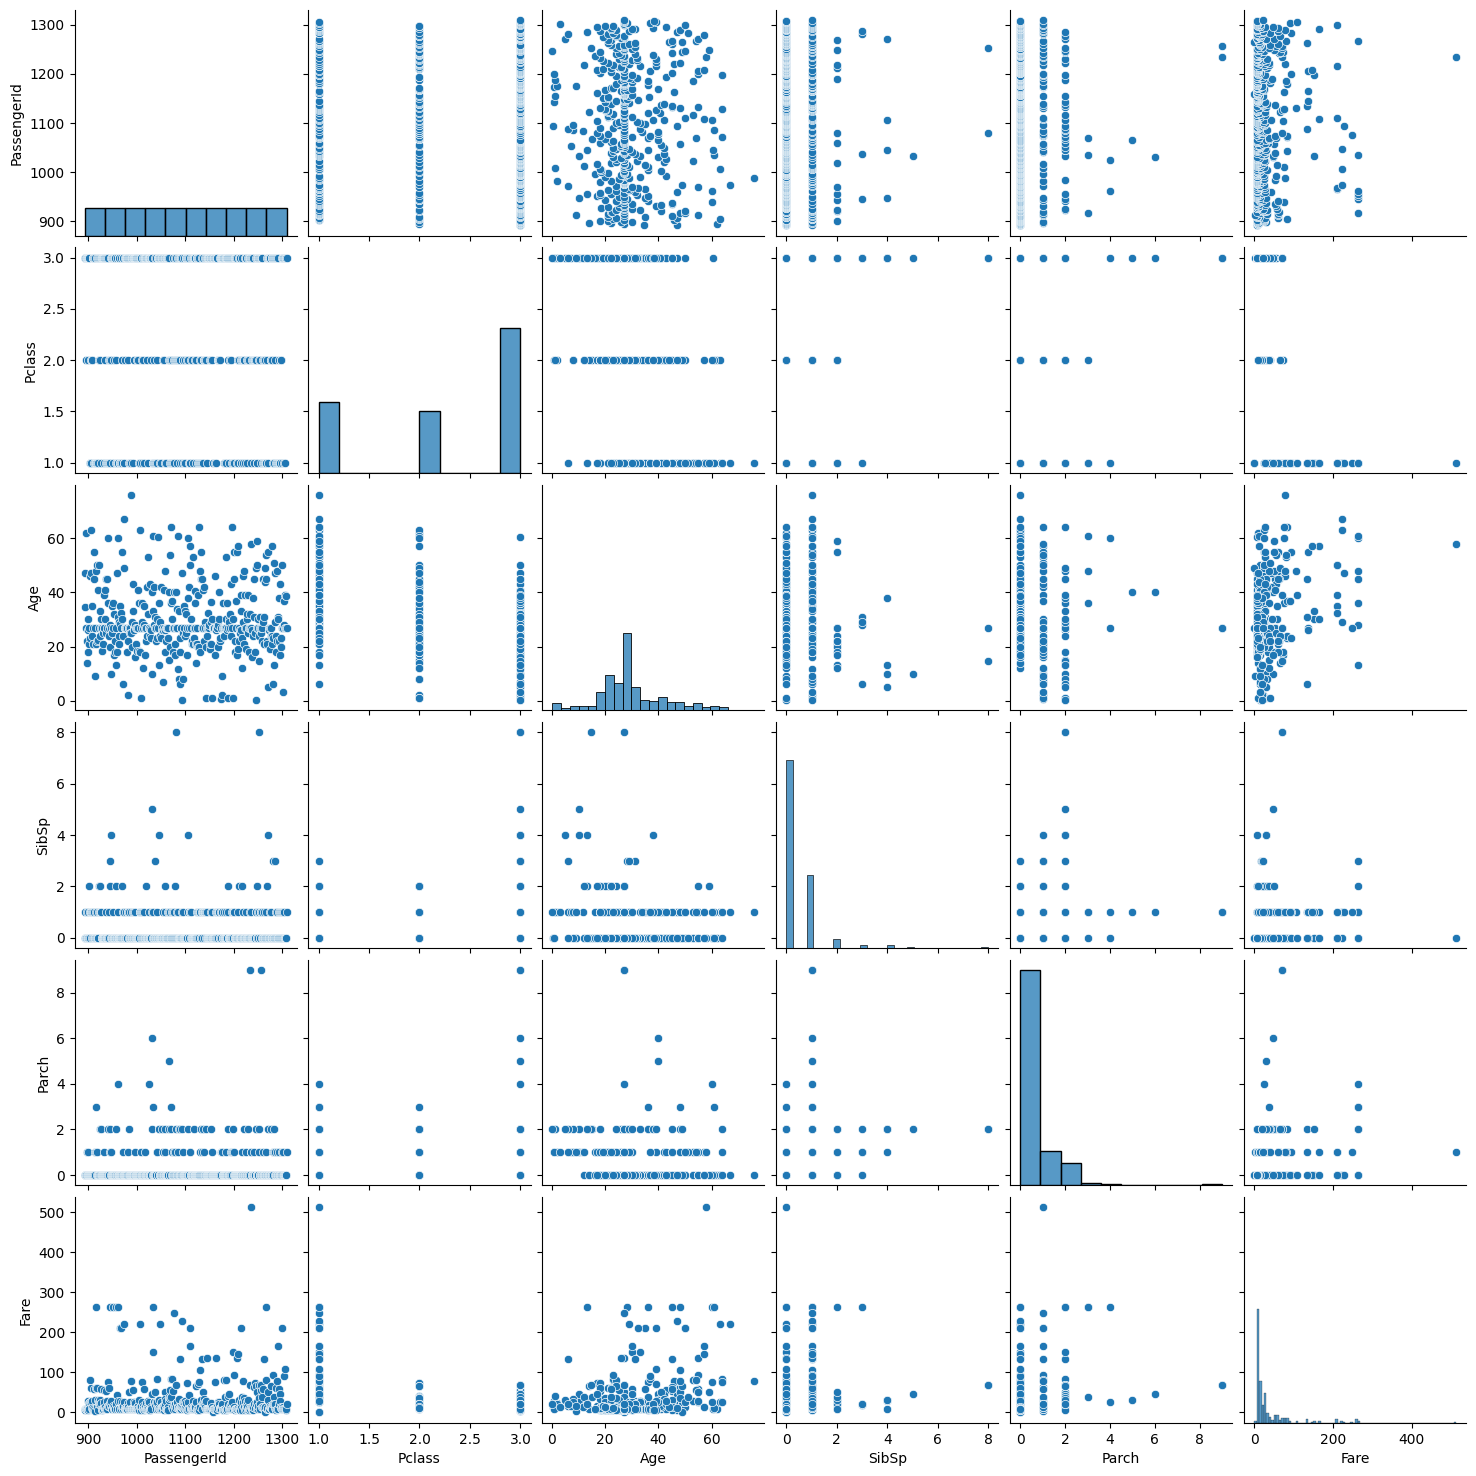

In [333]:
# Pair plot:
sns.pairplot(
    df_test,
)
plt.show()

Encode Categorical Variables

In [334]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [335]:
# Select features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X_train = df_train[features]
y_train = df_train['Survived']
X_test = df_test[features]

In [336]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


I used median imputation for numerical features because it is robust to outliers, and most-frequent imputation for categorical features to preserve the original category distribution. I applied this preprocessing using training data only to avoid data leakage.”

Wrong Down need help did not understand Question " Encode categorical variables."

In [337]:
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

In [338]:
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

In [339]:
cat_cols = ['Sex', 'Embarked']
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

In [340]:
# Encode categorical variables
le = LabelEncoder()
for col in cat_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

Model Building

In [351]:
# Use the already preprocessed X_train and y_train for splitting
# X_train (capitalized) already contains processed features from cell ThQD4CGLG3d1
# y_train (capitalized) is the target from cell ha3q4rP8Ed89
features_for_model = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X_model = X_train[features_for_model] # Use the processed X_train and select relevant features
y_model = y_train # Use the processed y_train

In [363]:
from sklearn.model_selection import train_test_split

In [364]:
x_train, x_test, y_train_split, y_test_split = train_test_split(X_model, y_model, train_size=0.75, random_state=100)

In [344]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 10)
(223, 10)
(668,)
(223,)


In [345]:
from sklearn.linear_model import LogisticRegression

In [346]:
log_model=LogisticRegression()

In [362]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

log_model.fit(x_train_scaled, y_train_split)

LogisticRegression()

# Task
Prepare the model data by ensuring `X_model` is created from the preprocessed `X_train` (which has numerical and encoded categorical variables) and `y_model` from the original `df_train['Survived']`. Then, split `X_model` and `y_model` into training and testing sets, scale the features using `StandardScaler` (fitting only on the training data), and finally, train a Logistic Regression model.

## Prepare Model Data

### Subtask:
Ensure X_model is created from the preprocessed X_train (which has numerical and encoded categorical variables) and y_model from the original df_train['Survived'].


**Reasoning**:
The previous code snippet for creating `X_model` and `y_model` might have used an inconsistent `y_train` variable due to overwriting from a previous `train_test_split`. To ensure consistency and adhere to the instructions, I will explicitly assign `X_model` from the preprocessed `X_train` and `y_model` directly from the `Survived` column of the original `df_train`.



In [354]:
features_for_model = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X_model = X_train[features_for_model] # X_train already contains processed features
y_model = df_train['Survived'] # Use the original Survived column from df_train

print(f"Shape of X_model: {X_model.shape}")
print(f"Shape of y_model: {y_model.shape}")

Shape of X_model: (891, 7)
Shape of y_model: (891,)


**Reasoning**:
The next step is to split the `X_model` and `y_model` into training and testing sets using `train_test_split` to prepare data for model training. The previous `train_test_split` command failed because `X_model` and `y_model` were not aligned properly. This will be corrected by using the newly created `X_model` and `y_model`.



In [355]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train_split, y_test_split = train_test_split(X_model, y_model, train_size=0.75, random_state=100)

print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_train_split: {y_train_split.shape}")
print(f"Shape of y_test_split: {y_test_split.shape}")

Shape of x_train: (668, 7)
Shape of x_test: (223, 7)
Shape of y_train_split: (668,)
Shape of y_test_split: (223,)


**Reasoning**:
Now that the data is split into training and testing sets, the next step is to scale the numerical features using StandardScaler to normalize them, which is a common practice before training machine learning models like Logistic Regression. The scaler will be fitted only on the training data to prevent data leakage.



In [356]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Train the Logistic Regression model
log_model.fit(x_train_scaled, y_train_split)

LogisticRegression()

## Summary:

### Data Analysis Key Findings

*   `X_model` was successfully created with 7 preprocessed features for 891 observations, and `y_model` (the 'Survived' target variable) also contained 891 observations, ensuring proper data alignment.
*   The data was split into training and testing sets with a 75% training size, resulting in training sets (`x_train`, `y_train_split`) of shape (668, 7) and (668,) respectively, and testing sets (`x_test`, `y_test_split`) of shape (223, 7) and (223,).
*   Features were successfully scaled using `StandardScaler`, fitted exclusively on the training data.
*   A Logistic Regression model was successfully trained using the scaled training features and the corresponding target variable.

### Insights or Next Steps

*   The next logical step is to evaluate the performance of the trained Logistic Regression model using the `x_test_scaled` and `y_test_split` data.
*   Consider exploring different classification algorithms or hyperparameter tuning to potentially improve model performance.


# Task
Make predictions and evaluate the performance of the trained Logistic Regression model by calculating and printing accuracy, precision, recall, and F1-score, generating a confusion matrix, and plotting the Receiver Operating Characteristic (ROC) curve with its Area Under the Curve (AUC).

## Make Predictions

### Subtask:
Use the trained `log_model` to make predictions on the scaled test features (`x_test_scaled`).


**Reasoning**:
The subtask requires using the trained logistic regression model to make class predictions and probability predictions on the scaled test data.



In [357]:
y_pred = log_model.predict(x_test_scaled)
y_pred_proba = log_model.predict_proba(x_test_scaled)[:, 1]

print(f"First 5 predicted classes: {y_pred[:5]}")
print(f"First 5 predicted probabilities (positive class): {y_pred_proba[:5]}")

First 5 predicted classes: [1 1 0 1 0]
First 5 predicted probabilities (positive class): [0.78864259 0.7259979  0.08928762 0.6654127  0.15443646]


## Evaluate Model Performance

### Subtask:
Calculate and print classification metrics such as accuracy, precision, recall, and F1-score using the predicted values and the true test labels (`y_test_split`). Also, generate a confusion matrix.


**Reasoning**:
To evaluate the model's performance as per the subtask, I need to import the required classification metrics from `sklearn.metrics`.



In [358]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Imported classification metrics from sklearn.metrics.")

Imported classification metrics from sklearn.metrics.


**Reasoning**:
Now that the necessary metrics are imported, I will calculate the accuracy, precision, recall, and F1-score, and the confusion matrix using the predicted values and the true test labels, then print them as instructed.



In [359]:
accuracy = accuracy_score(y_test_split, y_pred)
precision = precision_score(y_test_split, y_pred)
recall = recall_score(y_test_split, y_pred)
f1 = f1_score(y_test_split, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

conf_matrix = confusion_matrix(y_test_split, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.7892
Precision: 0.8025
Recall: 0.6771
F1-Score: 0.7345

Confusion Matrix:
[[111  16]
 [ 31  65]]


**Reasoning**:
The subtask requires plotting the Receiver Operating Characteristic (ROC) curve and calculating its Area Under the Curve (AUC). To achieve this, I need to import the necessary functions from `sklearn.metrics` and `matplotlib.pyplot`.



In [360]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

print("Imported roc_curve, roc_auc_score from sklearn.metrics and matplotlib.pyplot.")

Imported roc_curve, roc_auc_score from sklearn.metrics and matplotlib.pyplot.


**Reasoning**:
With the necessary functions imported, I will now calculate the ROC curve points (FPR, TPR) and the AUC score using the predicted probabilities and true labels, then plot the ROC curve and display the AUC score as instructed.



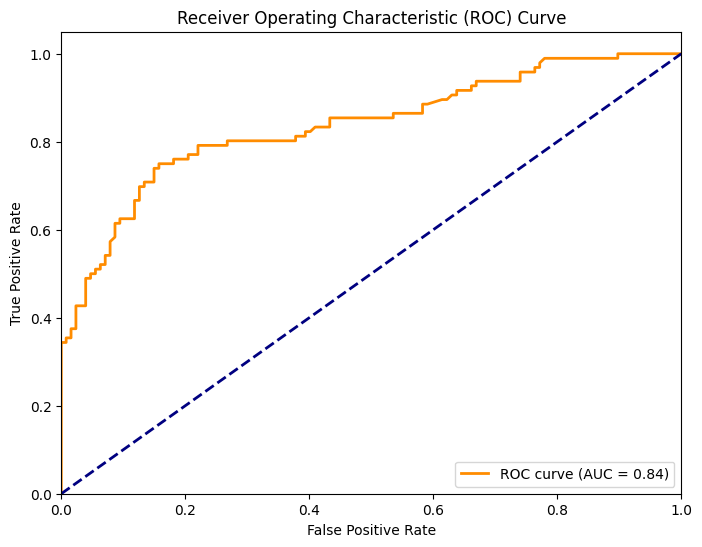

ROC AUC Score: 0.8366


In [361]:
fpr, tpr, thresholds = roc_curve(y_test_split, y_pred_proba)
roc_auc = roc_auc_score(y_test_split, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"ROC AUC Score: {roc_auc:.4f}")

## Summary:

### Data Analysis Key Findings

*   The trained Logistic Regression model successfully generated class predictions and probability predictions on the scaled test features. The first five predicted classes were `[1 1 0 1 0]`, and the corresponding probabilities for the positive class were `[0.7886, 0.7260, 0.0893, 0.6654, 0.1544]`.
*   The model achieved an accuracy of 0.7892, meaning approximately 78.92% of the predictions were correct.
*   The precision of the model is 0.8025, indicating that when the model predicts the positive class, it is correct about 80.25% of the time.
*   The recall of the model is 0.6771, meaning it correctly identified 67.71% of all actual positive cases.
*   The F1-Score, which is the harmonic mean of precision and recall, is 0.7345, providing a balanced measure of the model's performance.
*   The confusion matrix shows 111 true negatives, 16 false positives, 31 false negatives, and 65 true positives.
*   The Receiver Operating Characteristic (ROC) curve was plotted, and the Area Under the Curve (AUC) score is 0.8366, indicating a good ability of the model to distinguish between positive and negative classes.

### Insights or Next Steps

*   The model demonstrates reasonably good predictive performance with an accuracy of nearly 79% and a strong AUC score of 0.8366. However, the disparity between precision (0.8025) and recall (0.6771) suggests the model is better at avoiding false positives than it is at identifying all actual positive cases.
*   Depending on the specific business context, further optimization might be beneficial to improve recall (e.g., if identifying all positive cases is critical), potentially by adjusting the classification threshold or exploring alternative models.
